## Bibliotecas

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as Pipeline
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.under_sampling import RandomUnderSampler

## Importando os dados

In [43]:
#| output: false

df = pd.read_csv('~/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/dataset.csv')
df = df.replace('?', np.nan)
df = df.sample(frac = 0.1, ignore_index = True)

<positron-console-cell-43>:3: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.


In [44]:
#| output: false

X = df.loc[:, df.columns != 'SepsisLabel']
nomes_colunas = X.columns
y = df['SepsisLabel']

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [45]:
y_train.value_counts()

SepsisLabel
0    121904
1      2272
Name: count, dtype: int64

In [47]:
# Aplicando undersampling somente no conjunto de treino para manter a proporção em 50/50

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [48]:
y_train.value_counts()

SepsisLabel
0    2272
1    2272
Name: count, dtype: int64

In [49]:
y_test.value_counts()

SepsisLabel
0    30484
1      561
Name: count, dtype: int64

# Modelos

## MLP

In [50]:
#| output: false

pipeline_steps_mlp = [
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier(random_state=5))
]

pipeline_mlp = Pipeline(steps = pipeline_steps_mlp)

mlp_param_dist = {
    'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__solver': ['sgd', 'adam'],
    'classifier__alpha': 10.0**-np.arange(1, 7),
    'classifier__learning_rate': ['constant', 'adaptive']
}


# Fazendo loop para realizar 20 RandomizedSearchCV
best_score_overall_mlp = -1
best_params_overall_mlp = None
best_model_overall_mlp = None
historicos_mlp_cv = []

for c in range(1, 21):
    print(f'Execução de RandomizedSearchCV para MLP {c}/20')
    current_mlp_cv = RandomizedSearchCV(
        estimator=pipeline_mlp,
        param_distributions=mlp_param_dist,
        n_iter=5, 
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=c),
        scoring='f1_macro', # Ajustado para o f1_macro
        verbose=0,
        n_jobs=-1
    )
    current_mlp_cv.fit(X_train, y_train)

    resultados_mlp_iter = current_mlp_cv.cv_results_
    historico_mlp_df_iter = pd.DataFrame({
        'params': resultados_mlp_iter['params'],
        'mean_test_score': resultados_mlp_iter['mean_test_score'],
        'std_test_score': resultados_mlp_iter['std_test_score'],
        'rank_test_score': resultados_mlp_iter['rank_test_score']
    })

    historico_mlp_df_iter['run_iteration'] = c
    historicos_mlp_cv.append(historico_mlp_df_iter)

    if current_mlp_cv.best_score_ > best_score_overall_mlp:
        best_score_overall_mlp = current_mlp_cv.best_score_
        best_params_overall_mlp = current_mlp_cv.best_params_
        best_model_overall_mlp = current_mlp_cv.best_estimator_ 

all_historico_mlp_df = pd.concat(historicos_mlp_cv, ignore_index=True)



Execução de RandomizedSearchCV para MLP 1/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para MLP 2/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para MLP 3/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para MLP 4/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para MLP 5/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para MLP 6/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para MLP 7/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para MLP 8/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para MLP 9/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para MLP 10/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para MLP 11/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para MLP 12/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para MLP 13/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para MLP 14/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para MLP 15/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para MLP 16/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para MLP 17/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para MLP 18/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para MLP 19/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para MLP 20/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

In [51]:
all_historico_mlp_df

,params,mean_test_score,std_test_score,rank_test_score,run_iteration
0,"{'classifier__solver': 'sgd', 'classifier__lea...",0.668620,0.013295,5,1
1,"{'classifier__solver': 'sgd', 'classifier__lea...",0.694569,0.006017,1,1
2,"{'classifier__solver': 'adam', 'classifier__le...",0.681063,0.009353,4,1
3,"{'classifier__solver': 'sgd', 'classifier__lea...",0.693870,0.006266,2,1
4,"{'classifier__solver': 'adam', 'classifier__le...",0.687915,0.006747,3,1
...,...,...,...,...,...
95,"{'classifier__solver': 'adam', 'classifier__le...",0.665059,0.015309,4,20
96,"{'classifier__solver': 'adam', 'classifier__le...",0.663709,0.014130,5,20
97,"{'classifier__solver': 'sgd', 'classifier__lea...",0.680522,0.020863,3,20
98,"{'classifier__solver': 'sgd', 'classifier__lea...",0.685812,0.012260,1,20


In [52]:
print("\n--- Resultados Finais da Busca de Hiperparâmetros para MLP ---")
print(f"Melhor F1-score macro encontrado (validação cruzada): {best_score_overall_mlp:.4f}")
print(f"Melhores Hiperparâmetros globais: {best_params_overall_mlp}")


--- Resultados Finais da Busca de Hiperparâmetros para MLP ---
Melhor F1-score macro encontrado (validação cruzada): 0.6946
Melhores Hiperparâmetros globais: {'classifier__solver': 'sgd', 'classifier__learning_rate': 'adaptive', 'classifier__hidden_layer_sizes': (50, 50), 'classifier__alpha': 0.001, 'classifier__activation': 'relu'}


In [59]:
# Metricas

# %%
best_mlp = best_model_overall_mlp

test_accuracy = best_mlp.score(X_test, y_test)
print("Acurácia no conjunto de teste: ", test_accuracy)

y_pred_test = best_mlp.predict(X_test)

print('Valor do f1_score (macro): ', f1_score(y_test, y_pred_test, average='macro'))
print('Precisão do modelo (macro): ', precision_score(y_test, y_pred_test, average='macro'))
print("Valor do recall do modelo (macro): ", recall_score(y_test, y_pred_test, average='macro'))

print("\nRelatório de Classificação no conjunto de teste:")
print(classification_report(y_test, y_pred_test))

print("\nMatriz de Confusão no conjunto de teste:")
print(confusion_matrix(y_test, y_pred_test))

if hasattr(best_mlp.named_steps['classifier'], 'predict_proba'):
    y_pred_proba = best_mlp.predict_proba(X_test)[:, 1]
    print("\nROC AUC Score no conjunto de teste: ", roc_auc_score(y_test, y_pred_proba))

Acurácia no conjunto de teste:  0.7600579803511033
Valor do f1_score (macro):  0.47280349130377186
Precisão do modelo (macro):  0.5177562678636218
Valor do recall do modelo (macro):  0.6844763074916598

Relatório de Classificação no conjunto de teste:
              precision    recall  f1-score   support

           0       0.99      0.76      0.86     30484
           1       0.04      0.61      0.08       561

    accuracy                           0.76     31045
   macro avg       0.52      0.68      0.47     31045
weighted avg       0.97      0.76      0.85     31045


Matriz de Confusão no conjunto de teste:
[[23256  7228]
 [  221   340]]

ROC AUC Score no conjunto de teste:  0.7376929097079301


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


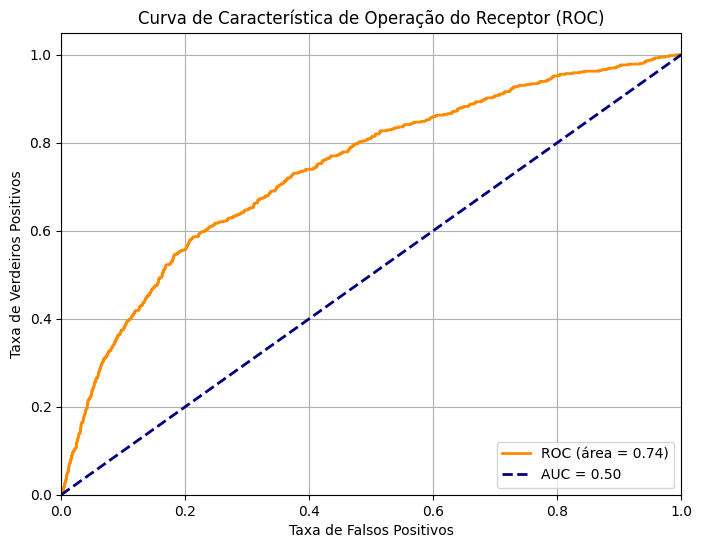

In [81]:
best_model_overall_mlp.fit(X_train, y_train)

y_pred_proba = best_model_overall_mlp.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='AUC = 0.50')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdeiros Positivos')
plt.title('Curva de Característica de Operação do Receptor (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Comitê de Redes Neurais

In [54]:
mlp1 = MLPClassifier(random_state=42)
mlp2 = MLPClassifier(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('mlp1', mlp1), ('mlp2', mlp2)],
    voting='soft',
    n_jobs=-1
)

pipeline_voting_mlp = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('classifier', voting_clf)
])

voting_mlp_param_dist = {
    'classifier__mlp1__hidden_layer_sizes': [(50,), (100,)],
    'classifier__mlp1__activation': ['relu', 'tanh'],
    'classifier__mlp2__hidden_layer_sizes': [(20,), (40,)],
    'classifier__mlp2__activation': ['relu', 'tanh'],
    'classifier__voting': ['soft', 'hard']
}

In [55]:
#| output: false
best_score_overall_voting_mlp = -1
best_params_overall_voting_mlp = None
best_model_overall_voting_mlp = None
historicos_voting_mlp_cv = []

for c in range(1, 21):
    print(f'Execução de RandomizedSearchCV para VotingClassifier {c}/20')
    current_voting_mlp_cv = RandomizedSearchCV(
        estimator=pipeline_voting_mlp,
        param_distributions=voting_mlp_param_dist,
        n_iter=5, 
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=c),
        scoring='f1_macro',
        verbose=0,
        n_jobs=-1
    )
    current_voting_mlp_cv.fit(X_train, y_train)

    resultados_voting_mlp_iter = current_voting_mlp_cv.cv_results_
    historico_voting_mlp_df_iter = pd.DataFrame({
        'params': resultados_voting_mlp_iter['params'],
        'mean_test_score': resultados_voting_mlp_iter['mean_test_score'],
        'std_test_score': resultados_voting_mlp_iter['std_test_score'],
        'rank_test_score': resultados_voting_mlp_iter['rank_test_score']
    })

    historico_voting_mlp_df_iter['run_iteration'] = c
    historicos_voting_mlp_cv.append(historico_voting_mlp_df_iter)

    if current_voting_mlp_cv.best_score_ > best_score_overall_voting_mlp:
        best_score_overall_voting_mlp = current_voting_mlp_cv.best_score_
        best_params_overall_voting_mlp = current_voting_mlp_cv.best_params_
        best_model_overall_voting_mlp = current_voting_mlp_cv.best_estimator_ 

all_historico_voting_mlp_df = pd.concat(historicos_voting_mlp_cv, ignore_index=True)

Execução de RandomizedSearchCV para VotingClassifier 1/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para VotingClassifier 2/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para VotingClassifier 3/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para VotingClassifier 4/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para VotingClassifier 5/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para VotingClassifier 6/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para VotingClassifier 7/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para VotingClassifier 8/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para VotingClassifier 9/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para VotingClassifier 10/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para VotingClassifier 11/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para VotingClassifier 12/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para VotingClassifier 13/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para VotingClassifier 14/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para VotingClassifier 15/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para VotingClassifier 16/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para VotingClassifier 17/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para VotingClassifier 18/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para VotingClassifier 19/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

Execução de RandomizedSearchCV para VotingClassifier 20/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/sit

In [56]:
all_historico_voting_mlp_df

,params,mean_test_score,std_test_score,rank_test_score,run_iteration
0,"{'classifier__voting': 'hard', 'classifier__ml...",0.679219,0.013389,3,1
1,"{'classifier__voting': 'hard', 'classifier__ml...",0.675358,0.005000,4,1
2,"{'classifier__voting': 'soft', 'classifier__ml...",0.692430,0.005217,2,1
3,"{'classifier__voting': 'soft', 'classifier__ml...",0.694923,0.004748,1,1
4,"{'classifier__voting': 'hard', 'classifier__ml...",0.672427,0.007114,5,1
...,...,...,...,...,...
95,"{'classifier__voting': 'soft', 'classifier__ml...",0.687971,0.013834,2,20
96,"{'classifier__voting': 'soft', 'classifier__ml...",0.698571,0.018555,1,20
97,"{'classifier__voting': 'hard', 'classifier__ml...",0.677139,0.011312,3,20
98,"{'classifier__voting': 'hard', 'classifier__ml...",0.675012,0.018663,4,20


In [57]:
print("\n--- Resultados Finais da Busca de Hiperparâmetros para VotingClassifier ---")
print(f"Melhor F1-score macro encontrado (validação cruzada): {best_score_overall_voting_mlp:.4f}")
print(f"Melhores Hiperparâmetros globais: {best_params_overall_voting_mlp}")


--- Resultados Finais da Busca de Hiperparâmetros para VotingClassifier ---
Melhor F1-score macro encontrado (validação cruzada): 0.7020
Melhores Hiperparâmetros globais: {'classifier__voting': 'soft', 'classifier__mlp2__hidden_layer_sizes': (20,), 'classifier__mlp2__activation': 'relu', 'classifier__mlp1__hidden_layer_sizes': (50,), 'classifier__mlp1__activation': 'tanh'}


In [58]:
# Metricas

# %%
best_voting_mlp = best_model_overall_voting_mlp

test_accuracy = best_voting_mlp.score(X_test, y_test)
print("Acurácia no conjunto de teste: ", test_accuracy)

y_pred_test = best_voting_mlp.predict(X_test)

print('Valor do f1_score (macro): ', f1_score(y_test, y_pred_test, average='macro'))
print('Precisão do modelo (macro): ', precision_score(y_test, y_pred_test, average='macro'))
print("Valor do recall do modelo (macro): ", recall_score(y_test, y_pred_test, average='macro'))

print("\nRelatório de Classificação no conjunto de teste:")
print(classification_report(y_test, y_pred_test))

print("\nMatriz de Confusão no conjunto de teste:")
print(confusion_matrix(y_test, y_pred_test))

if hasattr(best_mlp.named_steps['classifier'], 'predict_proba'):
    y_pred_proba = best_mlp.predict_proba(X_test)[:, 1]
    print("\nROC AUC Score no conjunto de teste: ", roc_auc_score(y_test, y_pred_proba))

Acurácia no conjunto de teste:  0.7550330165888227
Valor do f1_score (macro):  0.4705823755823856
Precisão do modelo (macro):  0.5174311847485786
Valor do recall do modelo (macro):  0.6836673152638326

Relatório de Classificação no conjunto de teste:
              precision    recall  f1-score   support

           0       0.99      0.76      0.86     30484
           1       0.04      0.61      0.08       561

    accuracy                           0.76     31045
   macro avg       0.52      0.68      0.47     31045
weighted avg       0.97      0.76      0.84     31045


Matriz de Confusão no conjunto de teste:
[[23098  7386]
 [  219   342]]

ROC AUC Score no conjunto de teste:  0.7376929097079301


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


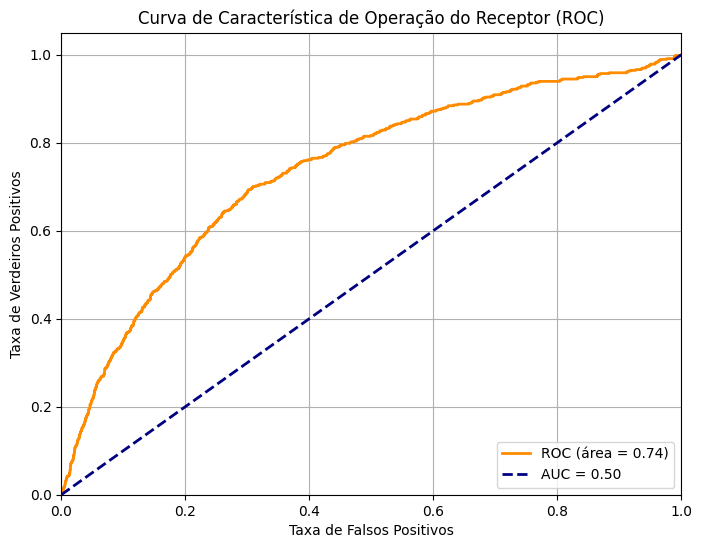

In [80]:
best_model_overall_voting_mlp.fit(X_train, y_train)

y_pred_proba = best_model_overall_voting_mlp.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='AUC = 0.50')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdeiros Positivos')
plt.title('Curva de Característica de Operação do Receptor (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Stacking Classifier

In [61]:
estimators = [
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier(random_state=42)),
]


stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=42),
    n_jobs=-1,
    cv=5
)

pipeline_stacking = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('classifier', stacking_clf)
])


stacking_param_dist = {
    # Parâmetros para o KNN
    'classifier__knn__n_neighbors': [3, 5, 7, 9],
    'classifier__knn__weights': ['uniform', 'distance'],
    # Parâmetros para a Árvore de Decisão
    'classifier__dt__max_depth': [3, 5, 10, None],
    'classifier__dt__min_samples_split': [2, 5, 10],
    # Parâmetros para o meta-modelo (Regressão Logística)
    'classifier__final_estimator__C': [0.1, 1, 10]
}

In [62]:
#| output: false
best_score_overall_stacking = -1
best_params_overall_stacking = None
best_model_overall_stacking = None
historicos_stacking_cv = []

for c in range(1, 21):
    print(f'Execução de RandomizedSearchCV para StackingClassifier {c}/20')
    current_stacking_cv = RandomizedSearchCV(
        estimator=pipeline_stacking,
        param_distributions=stacking_param_dist,
        n_iter=5, 
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=c),
        scoring='f1_macro',
        verbose=0,
        n_jobs=-1
    )
    current_stacking_cv.fit(X_train, y_train)

    resultados_stacking_iter = current_stacking_cv.cv_results_
    historico_stacking_df_iter = pd.DataFrame({
        'params': resultados_stacking_iter['params'],
        'mean_test_score': resultados_stacking_iter['mean_test_score'],
        'std_test_score': resultados_stacking_iter['std_test_score'],
        'rank_test_score': resultados_stacking_iter['rank_test_score']
    })

    historico_stacking_df_iter['run_iteration'] = c
    historicos_stacking_cv.append(historico_stacking_df_iter)

    if current_stacking_cv.best_score_ > best_score_overall_stacking:
        best_score_overall_stacking = current_stacking_cv.best_score_
        best_params_overall_stacking = current_stacking_cv.best_params_
        best_model_overall_stacking = current_stacking_cv.best_estimator_ 

all_historico_stacking_df = pd.concat(historicos_stacking_cv, ignore_index=True)


Execução de RandomizedSearchCV para StackingClassifier 1/20
Execução de RandomizedSearchCV para StackingClassifier 2/20
Execução de RandomizedSearchCV para StackingClassifier 3/20
Execução de RandomizedSearchCV para StackingClassifier 4/20
Execução de RandomizedSearchCV para StackingClassifier 5/20
Execução de RandomizedSearchCV para StackingClassifier 6/20
Execução de RandomizedSearchCV para StackingClassifier 7/20
Execução de RandomizedSearchCV para StackingClassifier 8/20
Execução de RandomizedSearchCV para StackingClassifier 9/20
Execução de RandomizedSearchCV para StackingClassifier 10/20
Execução de RandomizedSearchCV para StackingClassifier 11/20
Execução de RandomizedSearchCV para StackingClassifier 12/20
Execução de RandomizedSearchCV para StackingClassifier 13/20
Execução de RandomizedSearchCV para StackingClassifier 14/20


/home/msales/Documents/UFPE/2025.1/aprendizagem_de_maquina/trabalho/virtual_env/lib64/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Execução de RandomizedSearchCV para StackingClassifier 15/20
Execução de RandomizedSearchCV para StackingClassifier 16/20
Execução de RandomizedSearchCV para StackingClassifier 17/20
Execução de RandomizedSearchCV para StackingClassifier 18/20
Execução de RandomizedSearchCV para StackingClassifier 19/20
Execução de RandomizedSearchCV para StackingClassifier 20/20


In [63]:
all_historico_stacking_df

,params,mean_test_score,std_test_score,rank_test_score,run_iteration
0,"{'classifier__knn__weights': 'distance', 'clas...",0.674828,0.004666,5,1
1,"{'classifier__knn__weights': 'uniform', 'class...",0.684577,0.016984,3,1
2,"{'classifier__knn__weights': 'uniform', 'class...",0.690798,0.006524,2,1
3,"{'classifier__knn__weights': 'uniform', 'class...",0.678407,0.005983,4,1
4,"{'classifier__knn__weights': 'uniform', 'class...",0.692270,0.014277,1,1
...,...,...,...,...,...
95,"{'classifier__knn__weights': 'uniform', 'class...",0.687252,0.012744,3,20
96,"{'classifier__knn__weights': 'distance', 'clas...",0.672545,0.009139,5,20
97,"{'classifier__knn__weights': 'distance', 'clas...",0.697058,0.015606,2,20
98,"{'classifier__knn__weights': 'uniform', 'class...",0.685650,0.016089,4,20


In [64]:
print("\n--- Resultados Finais da Busca de Hiperparâmetros para StackingClassifier ---")
print(f"Melhor F1-score macro encontrado (validação cruzada): {best_score_overall_stacking:.4f}")
print(f"Melhores Hiperparâmetros globais: {best_params_overall_stacking}")


--- Resultados Finais da Busca de Hiperparâmetros para StackingClassifier ---
Melhor F1-score macro encontrado (validação cruzada): 0.6987
Melhores Hiperparâmetros globais: {'classifier__knn__weights': 'uniform', 'classifier__knn__n_neighbors': 9, 'classifier__final_estimator__C': 0.1, 'classifier__dt__min_samples_split': 2, 'classifier__dt__max_depth': 5}


In [65]:
# Métricas
best_stacking = best_model_overall_stacking

test_accuracy = best_stacking.score(X_test, y_test)
print("Acurácia no conjunto de teste: ", test_accuracy)

y_pred_test = best_stacking.predict(X_test)

print('Valor do f1_score (macro): ', f1_score(y_test, y_pred_test, average='macro'))
print('Precisão do modelo (macro): ', precision_score(y_test, y_pred_test, average='macro'))
print("Valor do recall do modelo (macro): ", recall_score(y_test, y_pred_test, average='macro'))

print("\nRelatório de Classificação no conjunto de teste:")
print(classification_report(y_test, y_pred_test))

print("\nMatriz de Confusão no conjunto de teste:")
print(confusion_matrix(y_test, y_pred_test))

if hasattr(best_mlp.named_steps['classifier'], 'predict_proba'):
    y_pred_proba = best_mlp.predict_proba(X_test)[:, 1]
    print("\nROC AUC Score no conjunto de teste: ", roc_auc_score(y_test, y_pred_proba))

Acurácia no conjunto de teste:  0.752488323401514
Valor do f1_score (macro):  0.4687102735006756
Precisão do modelo (macro):  0.5167135674232862
Valor do recall do modelo (macro):  0.6771223722517361

Relatório de Classificação no conjunto de teste:
              precision    recall  f1-score   support

           0       0.99      0.76      0.86     30484
           1       0.04      0.60      0.08       561

    accuracy                           0.75     31045
   macro avg       0.52      0.68      0.47     31045
weighted avg       0.97      0.75      0.84     31045


Matriz de Confusão no conjunto de teste:
[[23025  7459]
 [  225   336]]

ROC AUC Score no conjunto de teste:  0.7376929097079301


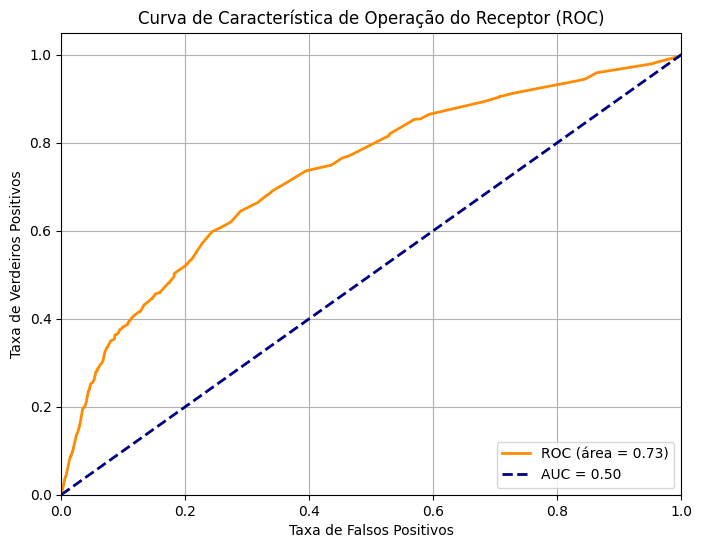

In [79]:
best_model_overall_stacking.fit(X_train, y_train)

y_pred_proba = best_model_overall_stacking.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='AUC = 0.50')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdeiros Positivos')
plt.title('Curva de Característica de Operação do Receptor (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## XGBoost

In [68]:
pipeline_xgb = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(random_state=42))
])

xgb_param_dist = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__gamma': [0, 0.1, 0.2],
    'classifier__reg_alpha': [0, 0.1, 0.5]
}

In [69]:
#| output: false
best_score_overall_xgb = -1
best_params_overall_xgb = None
best_model_overall_xgb = None
historicos_xgb_cv = []

for c in range(1, 21):
    print(f'Execução de RandomizedSearchCV para XGBoost {c}/20')
    current_xgb_cv = RandomizedSearchCV(
        estimator=pipeline_xgb,
        param_distributions=xgb_param_dist,
        n_iter=5, 
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=c),
        scoring='f1_macro',
        verbose=0,
        n_jobs=-1
    )
    current_xgb_cv.fit(X_train, y_train)

    resultados_xgb_iter = current_xgb_cv.cv_results_
    historico_xgb_df_iter = pd.DataFrame({
        'params': resultados_xgb_iter['params'],
        'mean_test_score': resultados_xgb_iter['mean_test_score'],
        'std_test_score': resultados_xgb_iter['std_test_score'],
        'rank_test_score': resultados_xgb_iter['rank_test_score']
    })

    historico_xgb_df_iter['run_iteration'] = c
    historicos_xgb_cv.append(historico_xgb_df_iter)

    if current_xgb_cv.best_score_ > best_score_overall_xgb:
        best_score_overall_xgb = current_xgb_cv.best_score_
        best_params_overall_xgb = current_xgb_cv.best_params_
        best_model_overall_xgb = current_xgb_cv.best_estimator_ 

all_historico_xgb_df = pd.concat(historicos_xgb_cv, ignore_index=True)

Execução de RandomizedSearchCV para XGBoost 1/20
Execução de RandomizedSearchCV para XGBoost 2/20
Execução de RandomizedSearchCV para XGBoost 3/20
Execução de RandomizedSearchCV para XGBoost 4/20
Execução de RandomizedSearchCV para XGBoost 5/20
Execução de RandomizedSearchCV para XGBoost 6/20
Execução de RandomizedSearchCV para XGBoost 7/20
Execução de RandomizedSearchCV para XGBoost 8/20
Execução de RandomizedSearchCV para XGBoost 9/20
Execução de RandomizedSearchCV para XGBoost 10/20
Execução de RandomizedSearchCV para XGBoost 11/20
Execução de RandomizedSearchCV para XGBoost 12/20
Execução de RandomizedSearchCV para XGBoost 13/20
Execução de RandomizedSearchCV para XGBoost 14/20
Execução de RandomizedSearchCV para XGBoost 15/20
Execução de RandomizedSearchCV para XGBoost 16/20
Execução de RandomizedSearchCV para XGBoost 17/20
Execução de RandomizedSearchCV para XGBoost 18/20
Execução de RandomizedSearchCV para XGBoost 19/20
Execução de RandomizedSearchCV para XGBoost 20/20


In [70]:
all_historico_xgb_df

,params,mean_test_score,std_test_score,rank_test_score,run_iteration
0,"{'classifier__subsample': 0.8, 'classifier__re...",0.715325,0.010606,5,1
1,"{'classifier__subsample': 1.0, 'classifier__re...",0.721429,0.006871,3,1
2,"{'classifier__subsample': 0.8, 'classifier__re...",0.726452,0.010096,1,1
3,"{'classifier__subsample': 1.0, 'classifier__re...",0.717447,0.005775,4,1
4,"{'classifier__subsample': 0.6, 'classifier__re...",0.722984,0.008882,2,1
...,...,...,...,...,...
95,"{'classifier__subsample': 1.0, 'classifier__re...",0.704012,0.015708,4,20
96,"{'classifier__subsample': 0.6, 'classifier__re...",0.712837,0.023665,2,20
97,"{'classifier__subsample': 0.8, 'classifier__re...",0.708153,0.013656,3,20
98,"{'classifier__subsample': 0.6, 'classifier__re...",0.697495,0.013236,5,20


In [71]:
print("\n--- Resultados Finais da Busca de Hiperparâmetros para XGBoost ---")
print(f"Melhor F1-score macro encontrado (validação cruzada): {best_score_overall_xgb:.4f}")
print(f"Melhores Hiperparâmetros globais: {best_params_overall_xgb}")


--- Resultados Finais da Busca de Hiperparâmetros para XGBoost ---
Melhor F1-score macro encontrado (validação cruzada): 0.7265
Melhores Hiperparâmetros globais: {'classifier__subsample': 0.8, 'classifier__reg_alpha': 0, 'classifier__n_estimators': 100, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.2, 'classifier__gamma': 0.2, 'classifier__colsample_bytree': 0.8}


In [72]:
# Metricas

# %%
best_xgb = best_model_overall_xgb

test_accuracy = best_xgb.score(X_test, y_test)
print("Acurácia no conjunto de teste: ", test_accuracy)

y_pred_test = best_xgb.predict(X_test)

print('Valor do f1_score (macro): ', f1_score(y_test, y_pred_test, average='macro'))
print('Precisão do modelo (macro): ', precision_score(y_test, y_pred_test, average='macro'))
print("Valor do recall do modelo (macro): ", recall_score(y_test, y_pred_test, average='macro'))

print("\nRelatório de Classificação no conjunto de teste:")
print(classification_report(y_test, y_pred_test))

print("\nMatriz de Confusão no conjunto de teste:")
print(confusion_matrix(y_test, y_pred_test))

if hasattr(best_mlp.named_steps['classifier'], 'predict_proba'):
    y_pred_proba = best_mlp.predict_proba(X_test)[:, 1]
    print("\nROC AUC Score no conjunto de teste: ", roc_auc_score(y_test, y_pred_proba))

Acurácia no conjunto de teste:  0.7768078595587051
Valor do f1_score (macro):  0.4847005418150746
Precisão do modelo (macro):  0.5221209311317542
Valor do recall do modelo (macro):  0.7201261419742475

Relatório de Classificação no conjunto de teste:
              precision    recall  f1-score   support

           0       0.99      0.78      0.87     30484
           1       0.05      0.66      0.10       561

    accuracy                           0.78     31045
   macro avg       0.52      0.72      0.48     31045
weighted avg       0.98      0.78      0.86     31045


Matriz de Confusão no conjunto de teste:
[[23745  6739]
 [  190   371]]

ROC AUC Score no conjunto de teste:  0.7376929097079301


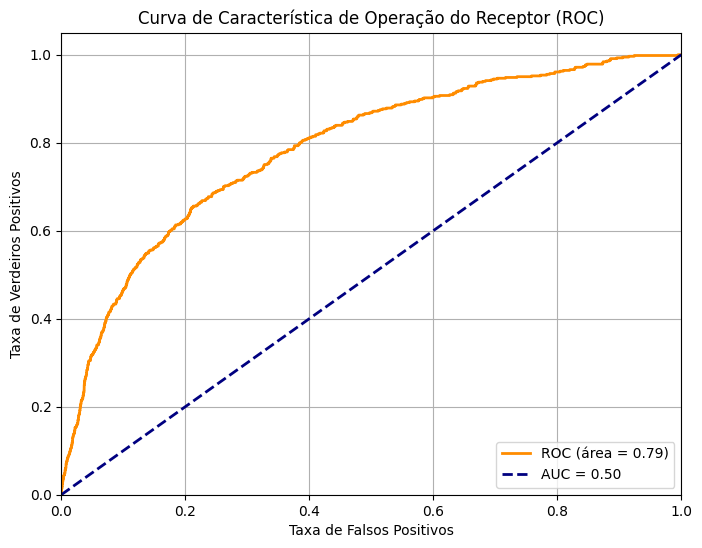

In [82]:
best_model_overall_xgb.fit(X_train, y_train)

y_pred_proba = best_model_overall_xgb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='AUC = 0.50')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdeiros Positivos')
plt.title('Curva de Característica de Operação do Receptor (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## LightGBM

In [74]:
pipeline_lgbm = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('classifier', LGBMClassifier(random_state=42))
])

lgbm_param_dist = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__num_leaves': [20, 31, 50, 70],
    'classifier__max_depth': [-1, 5, 10, 15],
    'classifier__boosting_type': ['gbdt', 'dart'],
    'classifier__subsample': [0.7, 0.9, 1.0],
    'classifier__colsample_bytree': [0.7, 0.9, 1.0],
    'classifier__reg_alpha': [0, 0.1, 0.5],
    'classifier__reg_lambda': [0, 0.1, 0.5]
}

In [75]:
#| output: false
best_score_overall_lgbm = -1
best_params_overall_lgbm = None
best_model_overall_lgbm = None
historicos_lgbm_cv = []

for c in range(1, 21):
    print(f'Execução de RandomizedSearchCV para LightGBM {c}/20')
    current_lgbm_cv = RandomizedSearchCV(
        estimator=pipeline_lgbm,
        param_distributions=lgbm_param_dist,
        n_iter=5, 
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=c),
        scoring='f1_macro',
        verbose=0,
        n_jobs=-1
    )
    current_lgbm_cv.fit(X_train, y_train)

    resultados_lgbm_iter = current_lgbm_cv.cv_results_
    historico_lgbm_df_iter = pd.DataFrame({
        'params': resultados_lgbm_iter['params'],
        'mean_test_score': resultados_lgbm_iter['mean_test_score'],
        'std_test_score': resultados_lgbm_iter['std_test_score'],
        'rank_test_score': resultados_lgbm_iter['rank_test_score']
    })

    historico_lgbm_df_iter['run_iteration'] = c
    historicos_lgbm_cv.append(historico_lgbm_df_iter)

    if current_lgbm_cv.best_score_ > best_score_overall_lgbm:
        best_score_overall_lgbm = current_lgbm_cv.best_score_
        best_params_overall_lgbm = current_lgbm_cv.best_params_
        best_model_overall_lgbm = current_lgbm_cv.best_estimator_ 

all_historico_lgbm_df = pd.concat(historicos_lgbm_cv, ignore_index=True)

Execução de RandomizedSearchCV para LightGBM 1/20
[LightGBM] [Info] Number of positive: 1818, number of negative: 1817
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2711
[LightGBM] [Info] Number of data points in the train set: 3635, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500138 -> initscore=0.000550
[LightGBM] [Info] Start training from score 0.000550
[LightGBM] [Info] Number of positive: 1817, number of negative: 1818
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.106285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2687
[LightGBM] [Info] Number of data points in the train set: 3635, numb

In [76]:
all_historico_lgbm_df

,params,mean_test_score,std_test_score,rank_test_score,run_iteration
0,"{'classifier__subsample': 0.7, 'classifier__re...",0.717540,0.008273,4,1
1,"{'classifier__subsample': 0.7, 'classifier__re...",0.719890,0.010872,2,1
2,"{'classifier__subsample': 0.7, 'classifier__re...",0.719343,0.008555,3,1
3,"{'classifier__subsample': 1.0, 'classifier__re...",0.710966,0.013767,5,1
4,"{'classifier__subsample': 0.9, 'classifier__re...",0.723524,0.009926,1,1
...,...,...,...,...,...
95,"{'classifier__subsample': 0.7, 'classifier__re...",0.677922,0.012611,4,20
96,"{'classifier__subsample': 0.7, 'classifier__re...",0.699964,0.017008,3,20
97,"{'classifier__subsample': 0.7, 'classifier__re...",0.720121,0.014233,1,20
98,"{'classifier__subsample': 0.7, 'classifier__re...",0.675825,0.012772,5,20


In [77]:
print("\n--- Resultados Finais da Busca de Hiperparâmetros para LightGBM ---")
print(f"Melhor F1-score macro encontrado (validação cruzada): {best_score_overall_lgbm:.4f}")
print(f"Melhores Hiperparâmetros globais: {best_params_overall_lgbm}")


--- Resultados Finais da Busca de Hiperparâmetros para LightGBM ---
Melhor F1-score macro encontrado (validação cruzada): 0.7280
Melhores Hiperparâmetros globais: {'classifier__subsample': 0.9, 'classifier__reg_lambda': 0.1, 'classifier__reg_alpha': 0.1, 'classifier__num_leaves': 31, 'classifier__n_estimators': 200, 'classifier__max_depth': 15, 'classifier__learning_rate': 0.1, 'classifier__colsample_bytree': 0.7, 'classifier__boosting_type': 'dart'}


In [78]:
# Metricas

# %%
best_lgbm = best_model_overall_lgbm

test_accuracy = best_lgbm.score(X_test, y_test)
print("Acurácia no conjunto de teste: ", test_accuracy)

y_pred_test = best_lgbm.predict(X_test)

print('Valor do f1_score (macro): ', f1_score(y_test, y_pred_test, average='macro'))
print('Precisão do modelo (macro): ', precision_score(y_test, y_pred_test, average='macro'))
print("Valor do recall do modelo (macro): ", recall_score(y_test, y_pred_test, average='macro'))

print("\nRelatório de Classificação no conjunto de teste:")
print(classification_report(y_test, y_pred_test))

print("\nMatriz de Confusão no conjunto de teste:")
print(confusion_matrix(y_test, y_pred_test))

if hasattr(best_mlp.named_steps['classifier'], 'predict_proba'):
    y_pred_proba = best_mlp.predict_proba(X_test)[:, 1]
    print("\nROC AUC Score no conjunto de teste: ", roc_auc_score(y_test, y_pred_proba))

Acurácia no conjunto de teste:  0.7768078595587051
Valor do f1_score (macro):  0.4851616969040475
Precisão do modelo (macro):  0.5224548465899597
Valor do recall do modelo (macro):  0.7236255961749374

Relatório de Classificação no conjunto de teste:
              precision    recall  f1-score   support

           0       0.99      0.78      0.87     30484
           1       0.05      0.67      0.10       561

    accuracy                           0.78     31045
   macro avg       0.52      0.72      0.49     31045
weighted avg       0.98      0.78      0.86     31045


Matriz de Confusão no conjunto de teste:
[[23741  6743]
 [  186   375]]

ROC AUC Score no conjunto de teste:  0.7376929097079301


[LightGBM] [Info] Number of positive: 2272, number of negative: 2272
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2999
[LightGBM] [Info] Number of data points in the train set: 4544, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


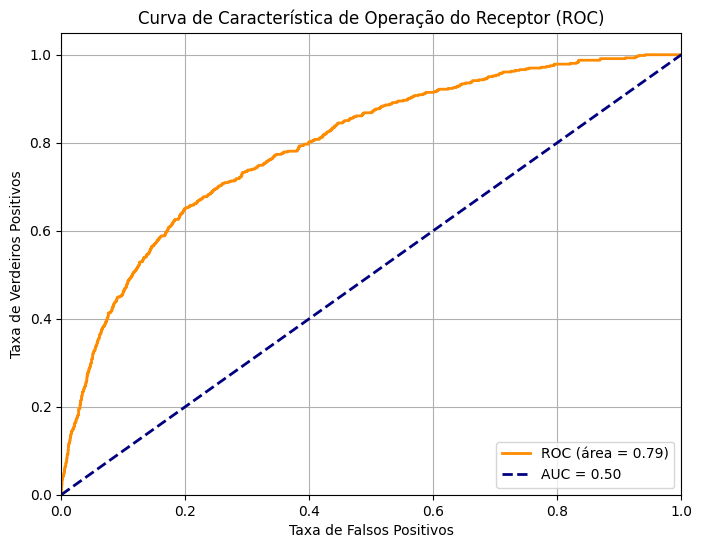

In [83]:
best_model_overall_lgbm.fit(X_train, y_train)

y_pred_proba = best_model_overall_lgbm.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='AUC = 0.50')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdeiros Positivos')
plt.title('Curva de Característica de Operação do Receptor (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()